<a href="https://colab.research.google.com/github/rashikbuksh/Stroke-Prediction-Using-Machine-Learning-and-XAI/blob/main/CSE475_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Dataset:**

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/healthcare-dataset-stroke-data.csv")

**Adding attribute's names:**

In [ ]:
dataset.columns=['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']
print(dataset.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


**Replacing missing values:**

In [ ]:
dataset["bmi"].replace({"?":""}, inplace=True)

**Data Encoding:**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

dataset['id']= label_encoder.fit_transform(dataset['id'])
dataset['gender']= label_encoder.fit_transform(dataset['gender'])
dataset['age']= label_encoder.fit_transform(dataset['age'])
dataset['hypertension']= label_encoder.fit_transform(dataset['hypertension'])
dataset['heart_disease']= label_encoder.fit_transform(dataset['heart_disease'])
dataset['ever_married']= label_encoder.fit_transform(dataset['ever_married'])
dataset['work_type']= label_encoder.fit_transform(dataset['work_type'])
dataset['Residence_type']= label_encoder.fit_transform(dataset['Residence_type'])
dataset['avg_glucose_level']= label_encoder.fit_transform(dataset['avg_glucose_level'])
dataset['bmi']= label_encoder.fit_transform(dataset['bmi'])
dataset['smoking_status']= label_encoder.fit_transform(dataset['smoking_status'])
dataset['stroke']= label_encoder.fit_transform(dataset['stroke'])

print(dataset.head())

    id  gender  age  hypertension  heart_disease  ever_married  work_type  \
0   48       1   65             0              1             1          2   
1  253       0   59             0              0             1          3   
2  159       1   78             0              1             1          2   
3  292       0   47             0              0             1          2   
4    7       0   77             1              0             1          3   

   Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0               1                342  152               1       1  
1               0                310  205               2       1  
2               0                215  124               2       1  
3               1                284  134               3       1  
4               0                285   54               2       1  


**Filling missing values:**

In [ ]:
dataset.fillna(dataset.median(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

**Random forest classifier:**

In [ ]:
rfc = RandomForestClassifier(n_estimators=400)
train, test = train_test_split(dataset, test_size=0.2)
train_features = train.iloc[:,1:11]
train_target = train["stroke"]
test_features = test.iloc[:,1:11]
test_target = test["stroke"]
rfc.fit(train_features,train_target)

predicted_target = rfc.predict(test_features)

tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(test_target, predicted_target).ravel()
sensitivity_rf = tp_rf / (tp_rf+fn_rf)
specificity_rf = tn_rf / (tn_rf+fp_rf)
balanced_Accuracy_rf = sensitivity_rf + specificity_rf / 2

print("Confusion matrix: \n")
print(confusion_matrix(test_target,predicted_target))
print("\nClassification report: \n")
print(classification_report(test_target,predicted_target))
print("Accuracy: {}".format(accuracy_score(test_target, predicted_target)))
print("Sensitivity: {}".format(sensitivity_rf))
print("Specificity: {}".format(specificity_rf))
print("Balanced Accuracy: {}".format(balanced_Accuracy_rf))

Confusion matrix: 

[[53  4]
 [ 8  7]]

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        57
           1       0.64      0.47      0.54        15

    accuracy                           0.83        72
   macro avg       0.75      0.70      0.72        72
weighted avg       0.82      0.83      0.82        72

Accuracy: 0.8333333333333334
Sensitivity: 0.4666666666666667
Specificity: 0.9298245614035088
Balanced Accuracy: 0.9315789473684211


**Decision Tree Classifier:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dtc = DecisionTreeClassifier()
dtc = dtc.fit(train_features,train_target)
y_pred = dtc.predict(test_features)

tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(test_target, y_pred).ravel()
sensitivity_dt = tp_dt / (tp_dt+fn_dt)
specificity_dt = tn_dt / (tn_dt+fp_dt)
balanced_Accuracy_dt = sensitivity_dt + specificity_dt / 2

print("Confusion matrix: \n")
print(confusion_matrix(test_target,y_pred))
print("\nClassification report: \n")
print(classification_report(test_target,y_pred))
print("Accuracy: {}".format(accuracy_score(test_target, y_pred)))
print("Sensitivity: {}".format(sensitivity_dt))
print("Specificity: {}".format(specificity_dt))
print("Balanced Accuracy: {}".format(balanced_Accuracy_dt))

Confusion matrix: 

[[44 13]
 [ 9  6]]

Classification report: 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        57
           1       0.32      0.40      0.35        15

    accuracy                           0.69        72
   macro avg       0.57      0.59      0.58        72
weighted avg       0.72      0.69      0.71        72

Accuracy: 0.6944444444444444
Sensitivity: 0.4
Specificity: 0.7719298245614035
Balanced Accuracy: 0.7859649122807018


**Support Vector Machine Classifier:**

In [ ]:
from sklearn import svm
from sklearn.metrics import roc_auc_score

SVM = svm.SVC(kernel = 'linear', C = 1, probability = True)
SVM.fit(train_features,train_target)
y_pred2 = SVM.predict(test_features)

tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(test_target, y_pred2).ravel()
sensitivity_svm = tp_svm / (tp_svm+fn_svm)
specificity_svm = tn_svm / (tn_svm+fp_svm)
balanced_Accuracy_svm = sensitivity_svm + specificity_svm / 2

print("Confusion matrix: \n")
print(confusion_matrix(test_target,y_pred2))
print("\nClassification report: \n")
print(classification_report(test_target,y_pred2))
print("Accuracy: {}".format(accuracy_score(test_target, y_pred2)))
print("Sensitivity: {}".format(sensitivity_svm))
print("Specificity: {}".format(specificity_svm))
print("Balanced Accuracy: {}".format(balanced_Accuracy_svm))

Confusion matrix: 

[[53  4]
 [ 9  6]]

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.60      0.40      0.48        15

    accuracy                           0.82        72
   macro avg       0.73      0.66      0.69        72
weighted avg       0.80      0.82      0.81        72

Accuracy: 0.8194444444444444
Sensitivity: 0.4
Specificity: 0.9298245614035088
Balanced Accuracy: 0.8649122807017544


**ROC-AUC Graph**

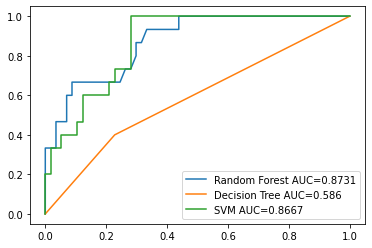

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred = rfc.predict_proba(test_features)[:, 1]
y_pred1 = dtc.predict_proba(test_features)[:, 1]
y_pred2 = SVM.predict_proba(test_features)[:, 1]

Yp=[y_pred,y_pred1,y_pred2]
titles=['Random Forest','Decision Tree','SVM','XGBoost']
def ROC(y_test,y_pred,title):
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label=title+" AUC="+str(auc))
  plt.legend()

n=3
j=0
for i in Yp:
  ROC(test_target,i,titles[j])
  j+=1


**XAI For Predicting Stroke**

In [ ]:
%pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from interpret.blackbox import LimeTabular
from interpret import show

test_features1 = test_features.values
rfc.fit(train_features.values,train_target)

limeTabular = LimeTabular(predict_fn=rfc.predict_proba, data=test_features, random_state=1)
lime_local = limeTabular.explain_local(test_features[-20:], test_target[-20:], name='LIME')

show(lime_local)